# Digits and characters Recogniton with Neural Network (No Library used )

### Instructor: Prof. Joseph Constantin
### Students: Rachad Lakis-Graziella Salameh

##### A neural network will be created to recoginze digits from 0 to 9 and characters upper case A to Z and lower case a to z. 
##### The data set used is the EMNIST dataset containing  697931 rows and 62 columns. Each row is an image of a character or a digit, with its real value given by a human.   
##### The first column of the dataset is the true label of the image, the folowing columns are an array representation of the image. We will read the data, split it as training and test test, create our model as Matrices and train the model with backpropagation algorithm.
##### Many epochs will be run. The forward and bckpropagation algorithms are implmented in ths code, not through a library.  Finally some test and examples are made to evaluate the model.

### Import the libraries and create the functions we will use in the code:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image
np.set_printoptions(precision=8)

##  Functions:


In [3]:
def sigmoid(v):
    return (1 / (1+ np.exp(-v)) )

In [4]:
def relu(v):
    return np.maximum(0,v)

In [5]:
def clip(x):
    if x<-1:
        return -1
    elif x>1:
        return 1
    else:
        return x

### Mean Square Error funciton:

In [6]:
def MSE(y, yhat):
    m =len(y)
    err = 0.0
    for i in range(m):
        err += np.square(y[i]-yhat[i])
    err = (1/2*m)*err
    return(err)

### ADD bias Function:

In [7]:
def add_bias(X_):
    return np.append(X_,1)

## Forward and back propagation and Delta of Layers:

#### Forward Propagatoin using a matrix, input and the sigmoid function by default:

In [8]:
def forward_prop(W_,X_,fn=sigmoid):
    if W_.shape[1] != X_.shape[0]:
        print("The matrix columns and the input length are not similar.")
        return
    output = fn(np.matmul(W_,X_)) #the sigmoid of the scalar product of X and column i of W
    return output

### Delta of the output layer:

In [9]:
def delta_output_layer_fn(W_output_, desired_, Y_out, a=1, fn=sigmoid):
    if fn==sigmoid:
        delta_output_layer = a * (desired_ - Y_out) * Y_out * (1- Y_out)    
    elif fn==relu:
        delta_output_layer = ( desired_ - Y_out)    
    return np.clip(delta_output_layer,-1,1)
        

### Delta of an inner layers:

In [10]:
def delta_hidden_layer_fn(W_local, W_next,X_input,Y_j,delta_next,fn=sigmoid):
    r_local , c_local = W_local.shape
    r_next, c_next = W_next.shape
    delta_hidden = np.zeros(r_local)
    if fn==sigmoid:
        for j in range(r_local):
            delta_j_next_sum = 0
            for k in range(r_next):
                delta_j_next_sum += delta_next[k] * W_next[k,j]
            delta_hidden[j] = a * Y_j[j] * (1-Y_j[j]) * delta_j_next_sum
    elif fn==relu:
        for j in range(r_local):
            delta_j_next_sum = 0
            for k in range(r_next):
                print(r_next)
                delta_j_next_sum += delta_next[k] * W_next[k,j] #IN case of large network, can cause overflow if not clipped
            delta_hidden[j] = a * Y_j[j]  * delta_j_next_sum
    return np.clip(delta_hidden,-1,1)

#### In many attempts, the problem of exploding gradients occured, the gradient from layer to layer was becoming too large and caused an overflow . After a reasearch some scientists gave the solution of clipping the gradient and limitng it between -1 and 1. 

### The EMNIST DATASET contains 62 labels, all the upper , lower case and the digits from 0-9. 
#### The network will be trained to  know the digit, the character and if it is upper or lower.  input[:, 0] is the label  input[:, 1:784] is the array represtenting the character or digit as an array

#### In the dataset, 0 to 9 represent the digits, 10 to 36 represents the lower case characters, 36 to 62 represents the upper case characters.
#### Timer was used to calculate the time of execution of each part.

In [11]:
tic =time.time()
train_input = np.array(pd.read_csv("DataSets\emnist-byclass-train\emnist-byclass-train.csv"))
test_input = np.array(pd.read_csv("DataSets\emnist-byclass-test\emnist-byclass-test.csv"))

toc = time.time()
exec_time = (toc-tic) 
print("The time is: " + str(exec_time))

The time is: 93.46533131599426


### Divide into training set and testing set:

In [12]:
train_Y = train_input[:,0]
train_X = train_input[:,1:]/255.0 #Nomlization

test_Y = test_input[:,0]
test_X = test_input[:,1:]/255.0#Nomlization

#### Training the whole dataset on  a personnal computer will neeed aroound 16 days (each operatin needs 0.13s). So we will take the first 30000 exmples from the training dataset and 5000 examples from the testing set.

In [13]:
train_X = train_X[:30000,:]
train_Y = train_Y[:30000]

test_X = test_X[:5000,:]
test_Y = test_Y[:5000] 


### Trasform the training label to  a matrix  so it can be compared to the ouptut of the neural network:

In [14]:
#Transform labels to arrays of length 62 to be able to be compared with the output layer
tic =time.time()
train_Y_matrix = np.zeros( (train_Y.shape[0],62) )
test_Y_matrix = np.zeros( (test_Y.shape[0], 62))

for i in range(train_Y.shape[0]):
    train_Y_matrix[i, train_Y[i]] = 1
    
for i in range(test_Y.shape[0]):
    test_Y_matrix[i, test_Y[i]] = 1

toc = time.time()
exec_time = (toc-tic) 
print("The time is: " + str(exec_time))

The time is: 0.015182971954345703


### Create Matrices, Define and Import the input. 
#### The matriceis chosen are 3 layers: First layer containing 256 neurons, the second containing 125 and the output layer contains 62 layers, same as the labels of the dataset.

In [15]:
input_length = 784
L1_neuron_nb = 256    #First Layer Nb of neurons
L2_neuron_nb = 128    #Second Layer Nb of neurons
L3_neuron_nb = 62     #FInal Layer Nb of neurons
np.random.seed(100)

### Fill matrices with random numbers from the normal Distribution:

In [16]:
#Forwarad prop to get Y1, output
#W1 = np.random.rand(L1_neuron_nb , input_length +1, dtype=np.float64)
#W2 = np.random.rand(L2_neuron_nb , L1_neuron_nb +1 , dtype=np.float64)
#W3 = np.random.rand(L3_neuron_nb, L2_neuron_nb +1, dtype=np.float64)
W1 = np.random.normal(size=(L1_neuron_nb , input_length +1))
W2 = np.random.normal(size=(L2_neuron_nb , L1_neuron_nb +1))
W3 = np.random.normal(size=(L3_neuron_nb, L2_neuron_nb +1))

### Back Propagation with activation = Sigmoid,   a=1,  eta=0.3 :

In [17]:
a = 1
eta = 0.03

### The calculation of the gradient of each layer so we tried to use the numpy library instead of for loops. The loops needs a lot of time, so delta of each layer is transformed to a matrix, the input to a matrix also, and the Gradient matrix of change of each layer was calulated as the matrix product of these two. 
### Then eta was multiplied by the Gradient matrix, and the result was mulitplied by the input to give the ammount of change for each weight.

In [139]:
tic =time.time()
epochs = 40
MSE_array = np.zeros(epochs)
m = train_X.shape[0]
#delta_output_layer_fn(W_output_, desired_,  Y_in_,Y_out, a=1, fn=sigmoid)
#delta_hidden_layer_fn(W_local, W_next,X_input,Y_j,delta_next)

for e in range(epochs):
    MSE_e = 0
    for i in range(m):
        X = add_bias(train_X[i,:])
        desired_Y = train_Y_matrix[i]
        Y1 = add_bias(forward_prop(W1,X))
        Y2 = add_bias(forward_prop(W2,Y1 ))
        output = forward_prop(W3,Y2,relu) #Sigmoid must not be used in output layer bcz for very large input arrasys,
        r1,c1 = W1.shape                  # sig(Sum(w_i*x_i))= 1 always
        r2,c2 = W2.shape
        r3,c3 = W3.shape  
        
        delta_j_output = delta_output_layer_fn(W3, desired_Y ,output,1,relu)
        delta_j_output = delta_j_output.reshape(delta_j_output.shape[0],1)
        Gradient_ouput = np.matmul(delta_j_output, Y2.reshape(1,Y2.shape[0]))#Reshape to create a matrix from not 1-d array
        W3 = W3 + eta*Gradient_ouput
        #print("output",Gradient_ouput)
        
        delta_j_2 = delta_hidden_layer_fn(W2, W3, Y1,Y2, delta_j_output)
        delta_j_2 = delta_j_2.reshape(delta_j_2.shape[0],1)
        Gradient_2 = np.matmul(delta_j_2, Y1.reshape(1,Y1.shape[0]) )
        W2 = W2 +eta*Gradient_2
        
        #print("Gradient_2",Gradient_2)
        delta_j_1 = delta_hidden_layer_fn(W1, W2, X,Y1, delta_j_2)
        delta_j_1 = delta_j_1.reshape(delta_j_1.shape[0],1)
        Gradient_1 = np.matmul(delta_j_1, X.reshape(1,X.shape[0]))
        #print("1",Gradient_1)
        W1 = W1 + eta * Gradient_1
        
        MSE_e += MSE(desired_Y , output)
        i+=1
    MSE_e /= m
    print("Epoch", e+1," is finished. The MSE is: " , MSE_e,".")
    MSE_array[e] = MSE_e
    e+=1
    
toc = time.time()
exec_time = (toc-tic) 
print("The time is: " + str(exec_time))

Epoch 1  is finished. The MSE is:  253.14598707507795 .
Epoch 2  is finished. The MSE is:  58.210621255671875 .
Epoch 3  is finished. The MSE is:  57.405779941168795 .
Epoch 4  is finished. The MSE is:  55.922307921345656 .
Epoch 5  is finished. The MSE is:  48.20275743044121 .
Epoch 6  is finished. The MSE is:  42.76821917382176 .
Epoch 7  is finished. The MSE is:  40.910391846464435 .
Epoch 8  is finished. The MSE is:  39.62651127089046 .
Epoch 9  is finished. The MSE is:  38.61918606851871 .
Epoch 10  is finished. The MSE is:  37.71220170543378 .
Epoch 11  is finished. The MSE is:  36.82204725604374 .
Epoch 12  is finished. The MSE is:  36.03573844119744 .
Epoch 13  is finished. The MSE is:  35.39438681841304 .
Epoch 14  is finished. The MSE is:  34.83298128534844 .
Epoch 15  is finished. The MSE is:  34.219394620300825 .
Epoch 16  is finished. The MSE is:  33.800028786928856 .
Epoch 17  is finished. The MSE is:  33.48017190343594 .
Epoch 18  is finished. The MSE is:  33.18297254062

#### In many attempts, the problem of exploding gradients occured, the gradient from layer to layer was becoming too large and caused an overflow . After a reasearch some scientists gave the solution of clipping the gradient and limitng it between -1 and 1. Like this, for a large network like this one, the problem of exploding gradients will be solved.

As we can see in the output, the time needed was '192703.95' seconds (53 hours). Very Time consuming on a single machine. And we can see that 20 pochs were enough for convergence. THe differnce between The MSEs is becoming very narrow (~0.3). 

### Plot of the Mean Square Error in function of the epochs:

In [305]:
MSE_array

array([253.14598708,  58.21062126,  57.40577994,  55.92230792,
        48.20275743,  42.76821917,  40.91039185,  39.62651127,
        38.61918607,  37.71220171,  36.82204726,  36.03573844,
        35.39438682,  34.83298129,  34.21939462,  33.80002879,
        33.4801719 ,  33.18297254,  32.78829341,  32.47358078,
        32.08310623,  31.71867327,  31.2782326 ,  30.81634779,
        30.37593826,  30.01831093,  29.56221104,  29.24595999,
        28.93478623,  28.35587271,  28.03425296,  27.73797718,
        27.41770163,  27.09553758,  26.70335566,  26.56122075,
        26.02852275,  25.79354937,  25.42433899,  25.09191736])

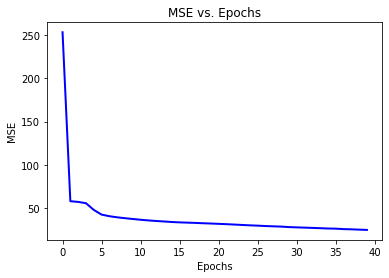

In [141]:
plt.xlabel('Epochs')
plt.ylabel('MSE') 
#plt.xticks(x)
plt.title('MSE vs. Epochs') 
x = np.arange(0,epochs,1)
plt.plot(x,MSE_array,color='blue', linewidth=2, markersize=12)

### Computation needs a lot of time so the final results will saved as csv files to carry the program each time after this part.

In [145]:
np.savetxt("W1.csv", W1 , delimiter=",")
np.savetxt("W2.csv", W2 , delimiter=",")
np.savetxt("W3.csv", W3 , delimiter=",")

### To read the saved Matricies

In [32]:
#To relaod the Matricies:
from numpy import loadtxt
W1 = loadtxt('W1.csv', delimiter=',')
W2 = loadtxt('W2.csv', delimiter=',')
W3 = loadtxt('W3.csv', delimiter=',')

## Test and Evluate the results:

### MSE of test test

In [37]:
tic =time.time()
MSE_test = 0
m2 = test_X.shape[0]

for i in range(m2):
    X = add_bias(test_X[i,:])
    desired_Y = test_Y_matrix[i]
    Y1 = add_bias(forward_prop(W1,X))
    Y2 = add_bias(forward_prop(W2,Y1 ))
    output = forward_prop(W3,Y2,relu) 
    MSE_test += MSE(desired_Y , output)
    i+=1
    
MSE_test /= m2

toc = time.time()
exec_time = (toc-tic) 
print("The time is: " + str(exec_time))
print("Knowing that the MSE of the test set in the final epoch was 25.9, the MSE of the Test set is: ",MSE_test, " which is very acceptable." )

The time is: 2.2842655181884766
Knowing that the MSE of the test set in the final epoch was 25.9 , the MSE of the Test set is:  28.04491028843313  which is very acceptable.


### Function predict: create a simple predict function to predict the results using the final weights of the network

In [70]:
def model_predict(X_):
    X_ = add_bias(X_) 
    Y1_ = add_bias(forward_prop(W1, X_)) 
    Y2_ = add_bias(forward_prop(W2,Y1_))
    output_ = forward_prop(W3,Y2_,relu)
    return output_

### We can test and take many random inputs from the the datase, print it as an image and see the predicted value given by the neural network.

In [53]:
A = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',]
def get_char_digit(i):
    return A[i]

In [79]:
a=np.array([1,2,3,4,5,5,5,5,10.1])
np.argmax(a)

8

In [80]:
test_Y[1:10]

array([ 0,  3, 33, 30, 24, 40,  5,  8,  2], dtype=int64)

Output test:  d
Desired value: d


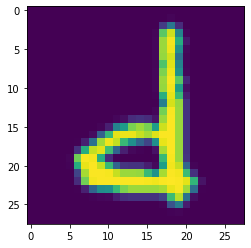

In [97]:
nb = np.random.randint(1000)
arr = np.reshape(train_X[nb,:], (28,28)).T
plt.imshow(arr)

X = train_X[nb]
Y = model_predict(X)
value_ex = np.argmax(Y)#gives the index which means the predicted value
desired_ex =  train_Y[nb] 

print("Output test: " ,get_char_digit(value_ex))
print("Desired value:",  get_char_digit(desired_ex))

Output test:  7
Desired value: 7


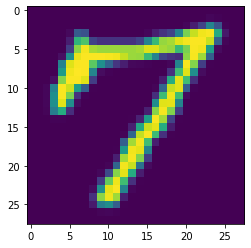

In [99]:
nb = np.random.randint(1000)
arr = np.reshape(train_X[nb,:], (28,28)).T
plt.imshow(arr)

X = train_X[nb]
Y = model_predict(X)
value_ex = np.argmax(Y)#gives the index which means the predicted value
desired_ex =  train_Y[nb] 

print("Output test: " ,get_char_digit(value_ex))
print("Desired value:",  get_char_digit(desired_ex))

Output test:  1
Desired value: l


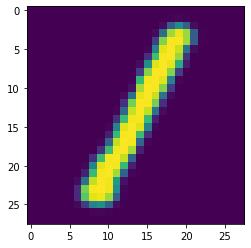

In [100]:
nb = np.random.randint(1000)
arr = np.reshape(train_X[nb,:], (28,28)).T
plt.imshow(arr)

X = train_X[nb]
Y = model_predict(X)
value_ex = np.argmax(Y)#gives the index which means the predicted value
desired_ex =  train_Y[nb] 

print("Output test: " ,get_char_digit(value_ex))
print("Desired value:",  get_char_digit(desired_ex))

Output test:  r
Desired value: T


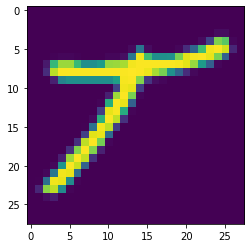

In [102]:
nb = np.random.randint(1000)
arr = np.reshape(train_X[nb,:], (28,28)).T
plt.imshow(arr)

X = train_X[nb]
Y = model_predict(X)
value_ex = np.argmax(Y)#gives the index which means the predicted value
desired_ex =  train_Y[nb] 

print("Output test: " ,get_char_digit(value_ex))
print("Desired value:",  get_char_digit(desired_ex))

Output test:  3
Desired value: j


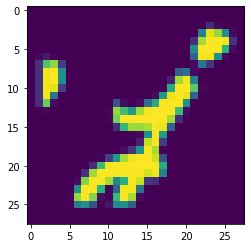

In [105]:
nb = np.random.randint(1000)
arr = np.reshape(train_X[nb,:], (28,28)).T
plt.imshow(arr)

X = train_X[nb]
Y = model_predict(X)
value_ex = np.argmax(Y)#gives the index which means the predicted value
desired_ex =  train_Y[nb] 

print("Output test: " ,get_char_digit(value_ex))
print("Desired value:",  get_char_digit(desired_ex))

Output test:  9
Desired value: q


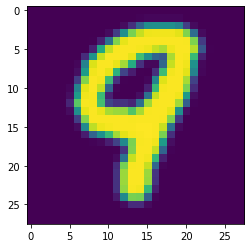

In [110]:
nb = np.random.randint(1000)
arr = np.reshape(train_X[nb,:], (28,28)).T
plt.imshow(arr)

X = train_X[nb]
Y = model_predict(X)
value_ex = np.argmax(Y)#gives the index which means the predicted value
desired_ex =  train_Y[nb] 

print("Output test: " ,get_char_digit(value_ex))
print("Desired value:",  get_char_digit(desired_ex))

### We can see many predicted values are correct, and some are false. But using only 30000 examples from 697931, for 40 epochs only, will not give exact results. Time and machine limits are in this case not perfect.
### But the same model, if trained for > 100 epochs and for the whole dataset could give nearly perfect reults.